In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
from sklearn.model_selection import train_test_split
from algorithms.Regression import Regression
from util.data_processing import *


In [2]:
data = read_data("beograd")
data.head()

,Vreme,PM10 [ug.m-3],O3 [ug.m-3],NO2 [ug.m-3],NOX [ug.m-3],CO [mg.m-3],NO [ug.m-3],PM2.5 [ug.m-3],PM1 [ug.m-3],V [m/s],dd [°],P [mb],t [°C],Rh [%]
0,2019-11-03 17:00:00,21.66,35.36,21.23,31.44,0.30,6.67,17.04,16.13,2.01,224.93,992.87,20.16,55.64
1,2019-11-03 18:00:00,24.14,33.42,22.74,34.53,0.30,7.65,18.15,16.87,1.83,229.53,992.72,19.87,56.26
2,2019-11-03 19:00:00,24.20,34.39,22.95,34.00,0.32,7.25,17.91,16.56,2.17,227.10,992.13,19.70,56.96
3,2019-11-03 20:00:00,22.06,36.53,19.88,29.92,0.35,6.54,16.34,15.48,1.85,230.43,992.12,19.65,57.00
4,2019-11-03 21:00:00,22.16,38.23,16.79,25.34,0.30,5.58,17.41,15.95,1.83,228.89,991.99,19.30,58.04


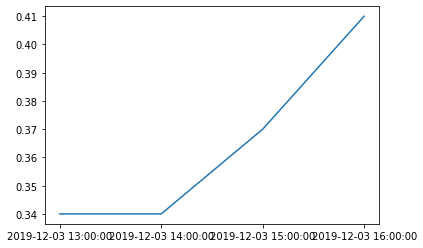

In [3]:
x = data["Vreme"].tail()
y = data["CO [mg.m-3]"].tail()

plt.plot(x,y)

In [6]:
x = data["Vreme"].values
x = np.linspace(0, len(x), len(x))
y = data["CO [mg.m-3]"].ffill(axis=0).values
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
model = Regression(1.)
model.fit(x_train, y_train, "ridge")
b, a = model.w
plt.scatter(x, y, color="g")
plt.plot([0, x_train.max()], [b, b + a * x_train.max()], color="k")
plt.plot([x_train[0], x_test.max()], [b, b + a * x_test.max()], color="r")
plt.show()
